<center style ="font-size: xx-large; font-weight: 600; line-height: 1.1;">
Advanced Statistics Homework 2 
</center>  
<center>
Jake Jackson - 2046805 
</center>

<a id="contents"></a>
## Contents 
  
[ Exercise 1](#ex1)  
[ Exercise 2](#ex2)  
[ Exercise 3](#ex3)  
[ Exercise 4](#ex4)  
[ Exercise 5](#ex5)  
[ Exercise 6](#ex6)  

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

<a id="ex1"></a>
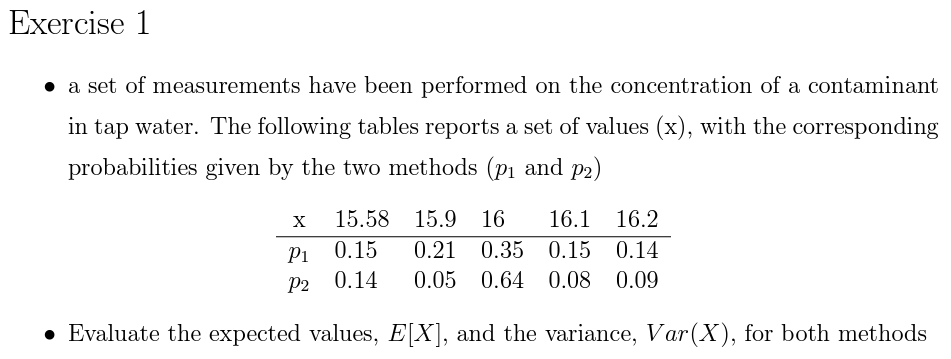
Expectation function 
$$E[X]=\sum_{i} x_{i} p\left(x_{i}\right) \quad E[X]=\int_{-\infty}^{+\infty} x f(x) d x$$
Varience
$$\operatorname{var}(X)=E[X-E[X]]^{2}=E\left[X^{2}\right]-(E[X])^{2}$$

In [132]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

E <- sum(x*p1)
E_x2 <- sum(x*x*p1) #Expectation of x^2 
var <- E_x2 - E*E
cat('E[X] = ', E, ' var[X] = ', var, '\n')

E2 <- sum(x*p2)
E2_x2 <- sum(x*x*p2) #Expectation of x^2 
var2 <- E2_x2 - E2*E2
cat('E[X_2] = ', E2, ' var[X_2] = ', var2, '\n')

E[X] =  15.959  var[X] =  0.033979 
E[X_2] =  15.9622  var[X_2] =  0.02816716 


<a id="ex2"></a>

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

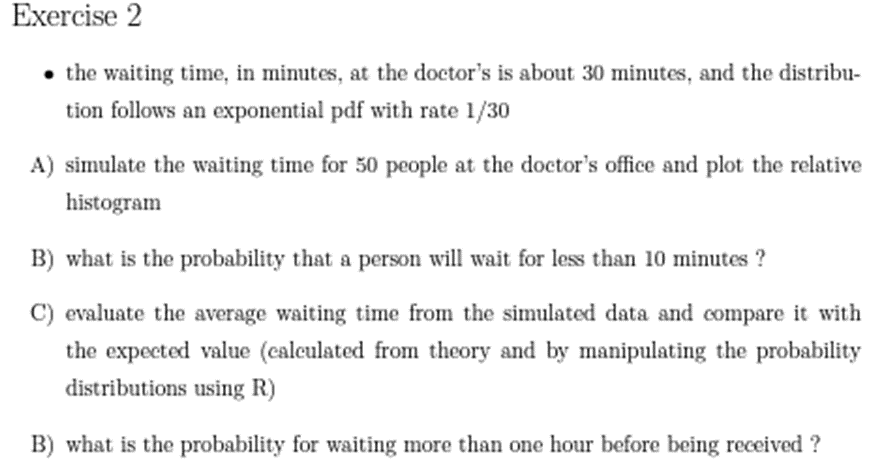

<a id="ex3"></a>

Probabilty for wait longer than 10 mins =  0.2834687 
Average  waiting time =  25.02034 
Expected waiting time =  29.99722 
Probibilty wait longer than 60 =  0.1353353 


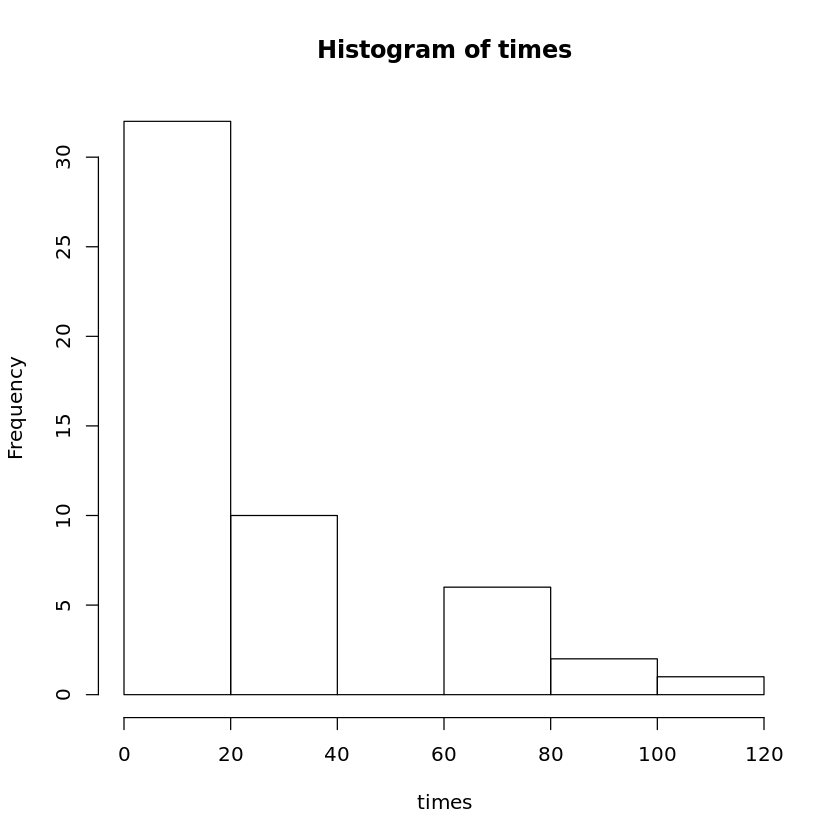

In [39]:
lambda <- 1/30;
x <- 0:50; 
times <- rexp(x,lambda)
h <- hist(times)
#print(h)
l_10 <- pexp(10, lambda)
cat('Probabilty for wait longer than 10 mins = ', l_10, '\n')

mu <- mean(times)
cat('Average  waiting time = ', mu, '\n')

xrange <- 0:1000
p <- dexp(xrange, lambda)
E <- sum(xrange*p)
cat('Expected waiting time = ', E, '\n')

wg_60<- 1-pexp(60, lambda)
cat('Probibilty wait longer than 60 = ', wg_60, '\n')

#time <- rand*30
#barplot(ap, names=x, col='darkviolet', xlab='x', ylab='dexp(x|lambda)', density=30, main = sprintf("Exponential  distr.  lambda=%.2f",lambda), ylim=c(0,0.375), cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5) 
#cat(paste(c("P(3<X<7)  =  ", pexp(7,lambda) -pexp(3,lambda),'\n')))
#?pexp


<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

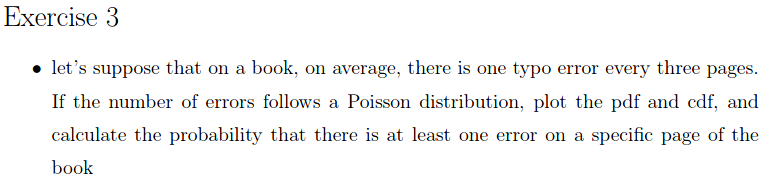

Probability of at least one error =  0.2834687 


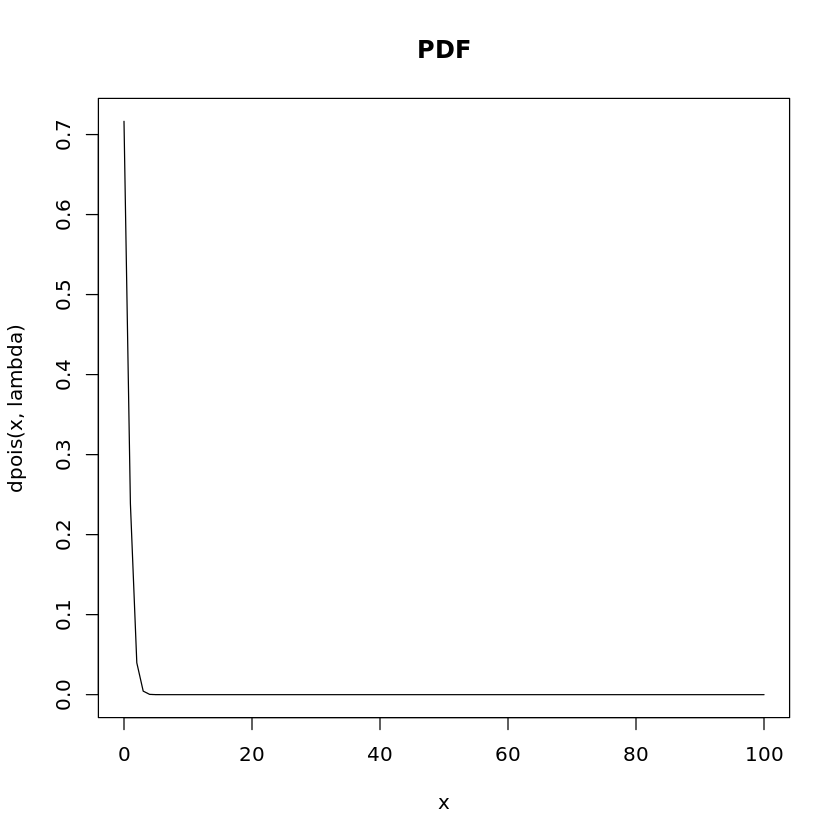

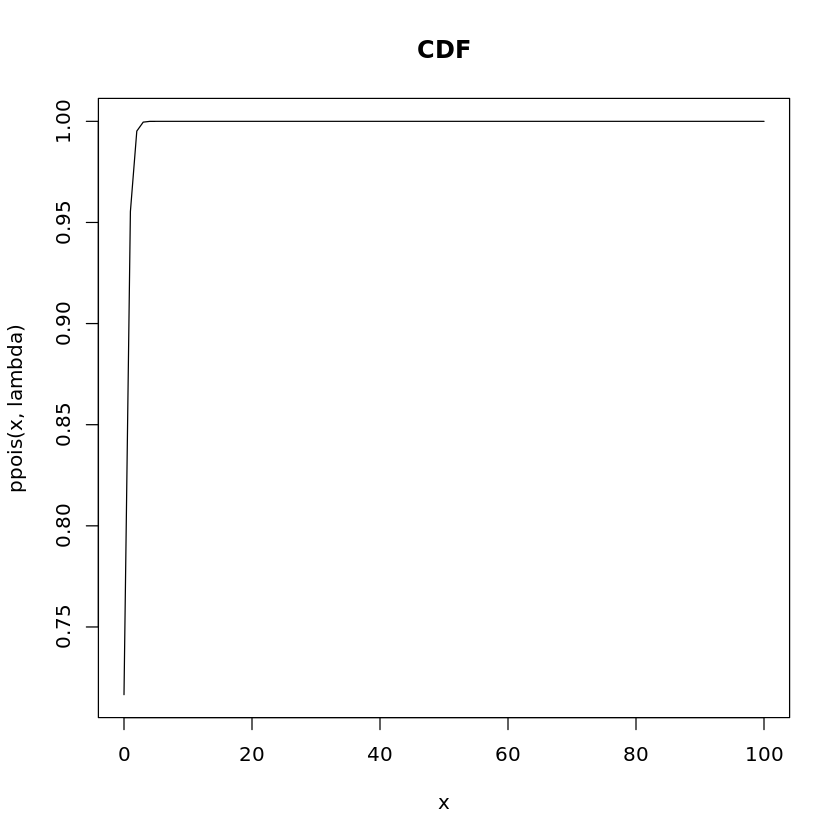

In [43]:
#At least one error!
lambda <- 1/3 # is the expected rate of occurrences
x<-0:100

#dist<- dpois(x,lambda) #Probability Distribution Function 
#rnd <- rpois(x,lambda) #Random Distribution from poission 
#cdf <- ppois(x,lambda) #cumulative density function 
P_1 <- 1- ppois(0, lambda)
cat("Probability of at least one error = ", P_1, '\n')


plot(x,  dpois(x,lambda), main = "PDF" ,type ='l')
plot(x,  ppois(x,lambda), main = "CDF", type = 'l')

<a id="ex4"></a>

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

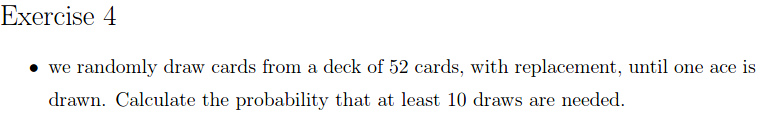

In [25]:
prob_10 <- pnbinom(9, 1, 4/52, lower = FALSE) 
cat("Probablity at least 10 are needed = ", prob_10)

Probablity at least 10 are needed =  0.4491371

<a id="ex5"></a>

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

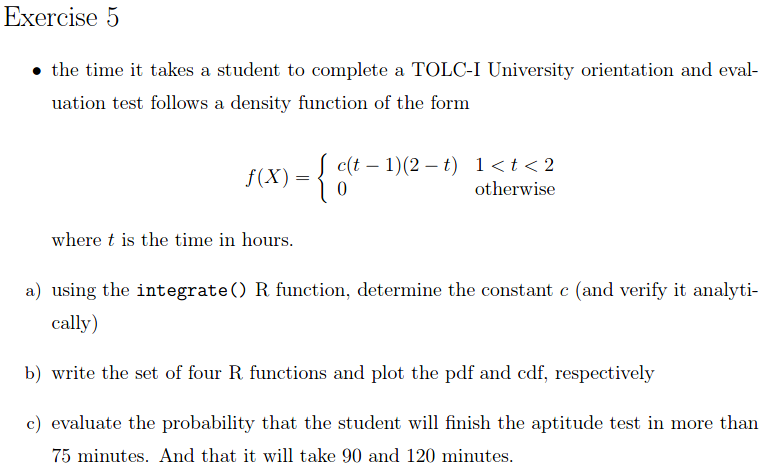

$$I=\int_1^2 (t − 1)(2 − t) \, dt = \int_1^2 (-t^2+3t-2)dt= \left[-\frac{t^3}{3}+\frac{3}{2}t^2-2t\right]_1^2 = \frac{1}{6}$$

In order to normalise the intergral of the PDF must be one
$$ c= 6$$

$$d=PDF = 6(t − 1)(2 − t)$$ 



$$p=CDF =6\left(-\frac{t^{3}}{3}+\frac{3}{2} t^{2}-2 t\right)+5$$

0.1666667 with absolute error < 1.9e-15

pdf normalisation constant =  6 
Normalisation verfication,  intergral =  1 
CDF peak value -5 


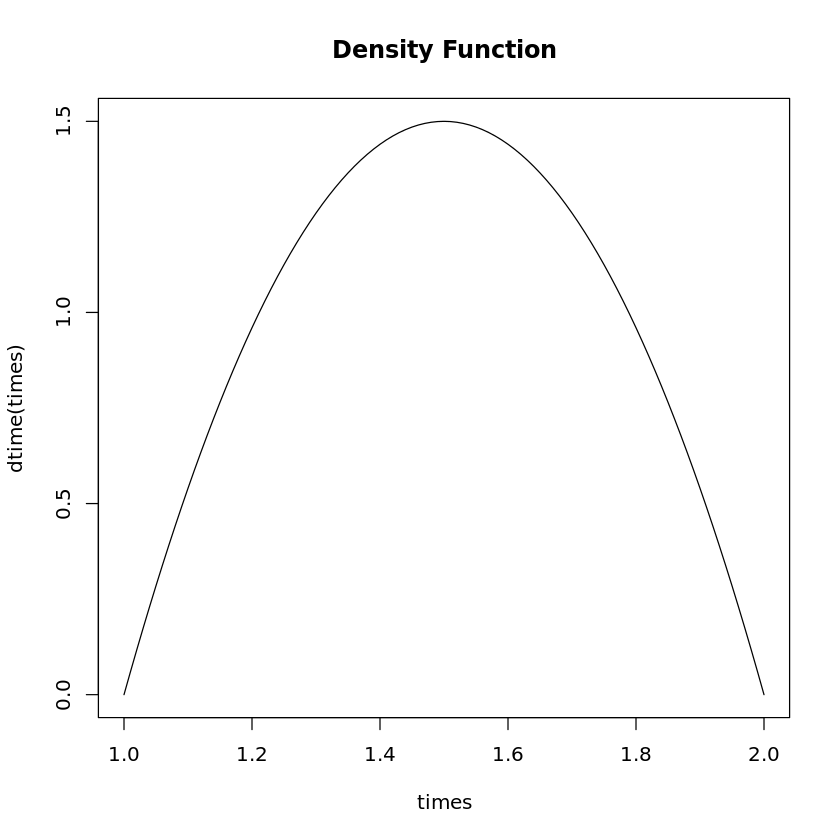

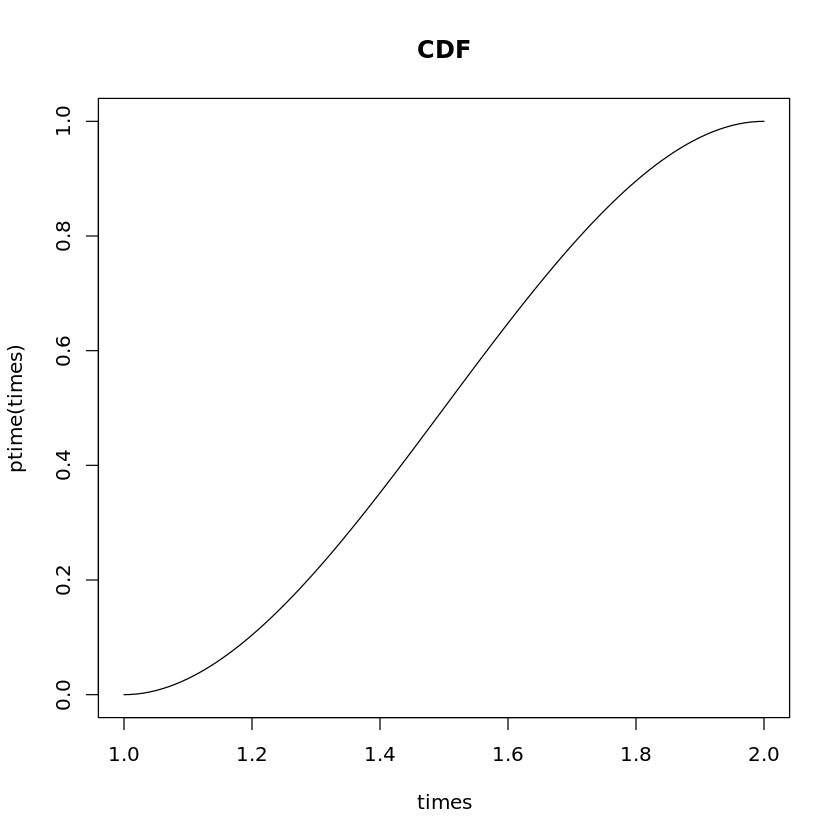

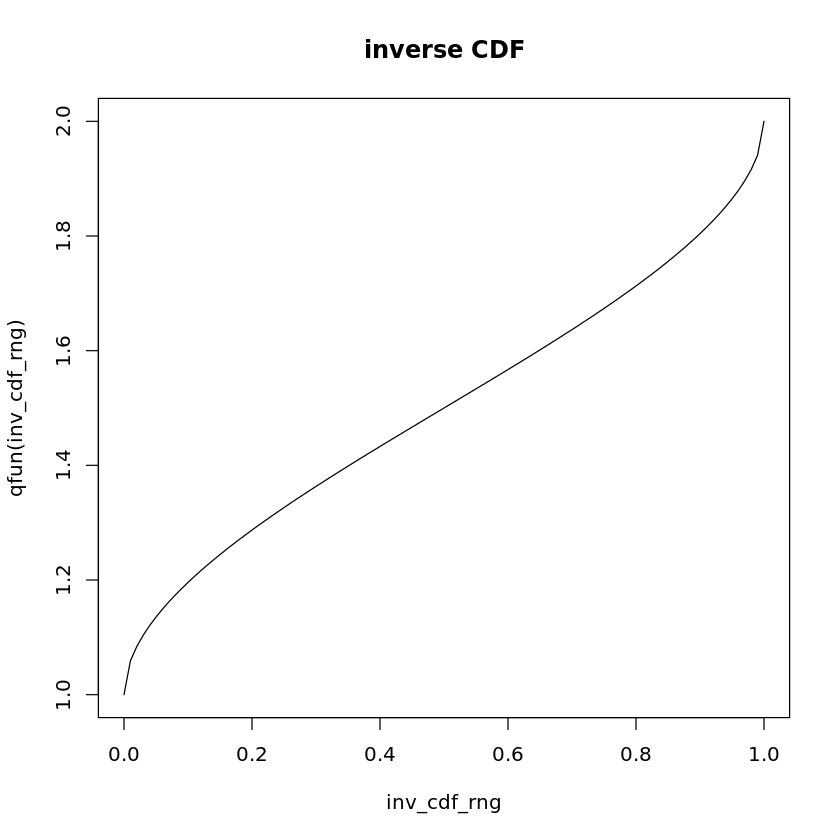

Probability longer than 75min =  0.84375 
Probability takes between 90 and 120min =  0.5 


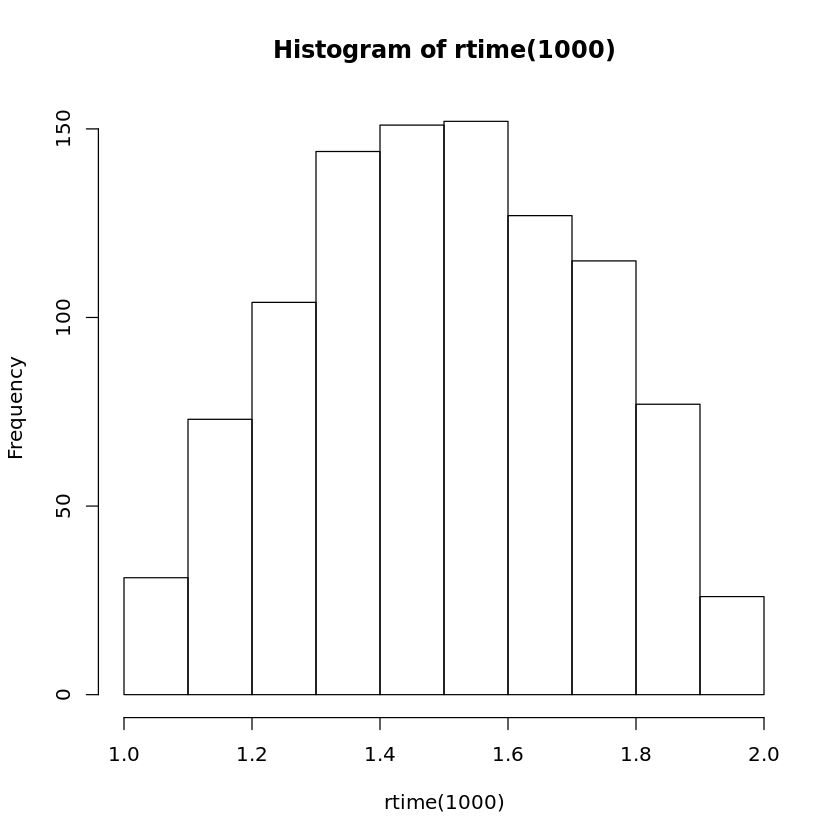

In [18]:
pre_dtime <-function(t){
    (t-1)*(2-t)
}
I <- integrate(pre_dtime, lower = 1, upper = 2)
I
c <- 1/I$value #normalization constant
cat('pdf normalisation constant = ', c , '\n')


dtime <- function(t) {# -------------------------------------PDF
    c*(t-1)*(2-t)
}
I_norm <- integrate(dtime, lower = 1, upper = 2)#check if normalized correctly 
cat('Normalisation verfication,  intergral = ', I_norm$value, '\n')



ptime_pre <- function(t){
    6*(-(t^3)/3 + (3/2)*t^2-2*t)
}
#find intergration constant K
peak <-  ptime_pre(1)
cat('CDF peak value', peak, '\n')

ptime<- function(t){
    6*(-(t^3)/3 + (3/2)*t^2-2*t)+ 5
}

qtime <- function(t){#----------quantile function (inverse cdf)
    sq_rt <-sqrt(t^2 - t)
    cb_rt <- (2*sq_rt-2*t+1)^1/3
    (0.5*(cb_rt+(1/cb_rt)+3))
}

rtime <- function(n) { # ---------------------------Random dist 
    rnd_vals<- runif(n, min = 0, max =1)
    qtime(rnd_vals)
}


#inverse cdf using the uniroot function for the cubic cdf in the range of interest
qtime <- function(inv_cdf_rng){
    inv_cdf <- vector()
    for (value in inv_cdf_rng){
        cdf_root <- function(t){return (6*(3*(t^2)/2 - (t^3)/3 - 2*t)+5-value)} 
        root <- uniroot(cdf_root, lower = 1, upper = 2)
        inv_cdf <- c(inv_cdf,root$root)
    }
    return(inv_cdf)
}



inv_cdf_rng <- seq(0,1,0.01)
times <- seq(1, 2, 0.01)

plot(times, dtime(times), type="l" , main ="Density Function")
plot(times, ptime(times), type="l", main ="CDF")
plot(inv_cdf_rng, qfun(inv_cdf_rng), type="l" , main ="inverse CDF")

hist(rtime(1000))

t_75 <- 75/60
P_75 <- 1 - ptime(t_75)
cat("Probability longer than 75min = ", P_75, '\n')

lower <- 90/60
upper <- 120/60

P_90_120 <- ptime(upper) - ptime(lower)
cat("Probability takes between 90 and 120min = ", P_90_120, '\n')

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

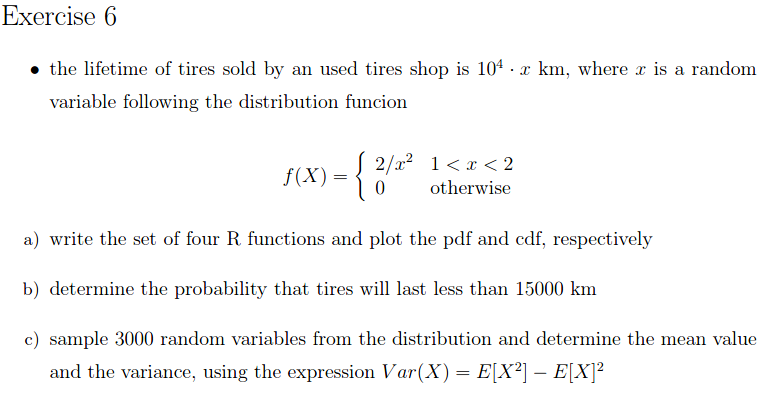

Normalisation test
$$\int_1^2 \frac{2}{x^2} dx = \left[-\frac{2}{x}\right]_1^2 =1$$

$$CDF = \int \frac{2}{x^2} dx = -\frac{2}{x}+C$$

Int constant -1

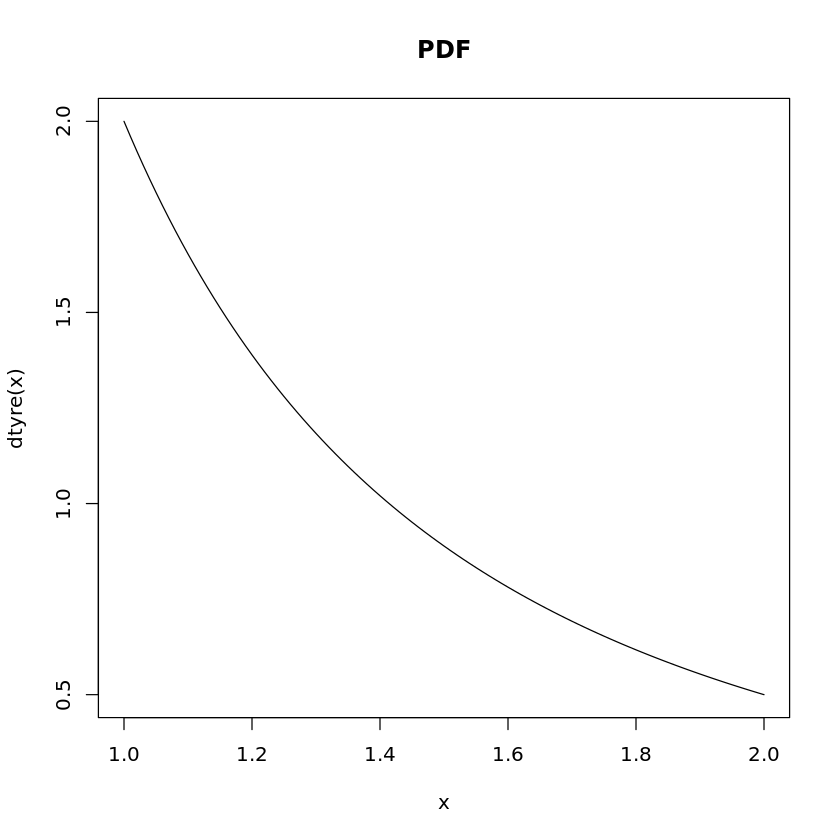

Probability lasting > 15000 km =   0.6666667 


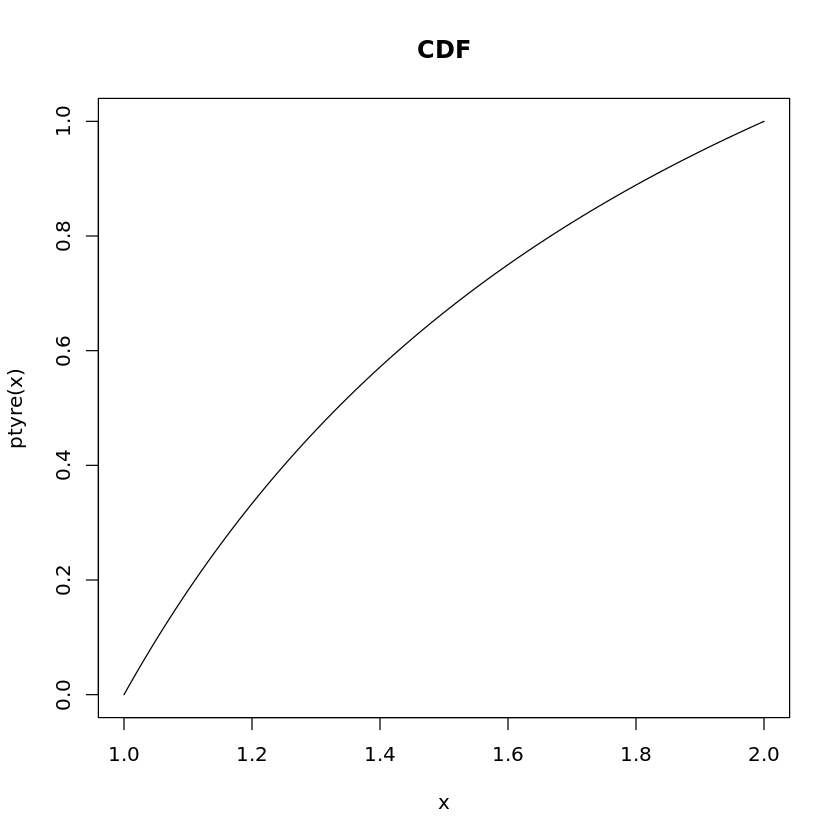

Expected wear distance =  1.390267 x10^4 km 
Variance =  0.07710526 x10^4 km 


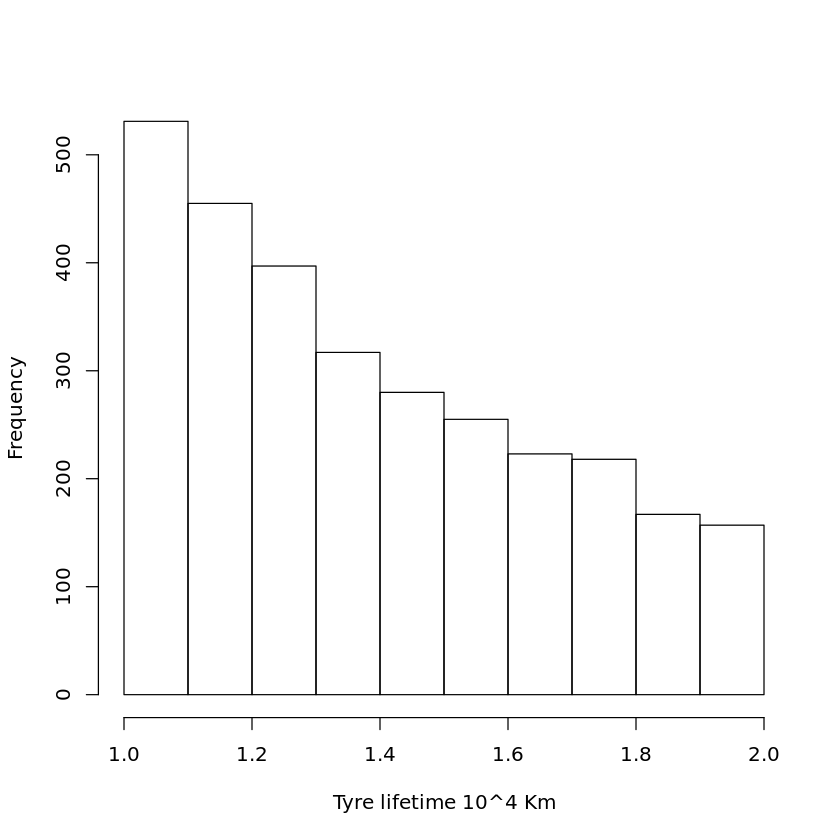

In [51]:
dtyre <- function(x) {
    2/(x*x)
}
d_int <- function(x){
    -2/x
}
cat('Int constant', d_int(2))

ptyre <-function(x){
    -2/x +2
}

qtyre <- function(x){
    2/(2-x)
}
rtyre <- function (n){
    rnd_vals<- runif(n, min = 0, max =1)
    qtyre(rnd_vals)
}

x<-seq(1,2,0.01)
plot(x, dtyre(x) , type = 'l', main ="PDF")
plot(x, ptyre(x) , type = 'l', main ="CDF")
cat('Probability lasting > 15000 km =  ', ptyre(1.5),  '\n')
h<-hist(rtyre(3000), xlab = 'Tyre lifetime 10^4 Km', main = '')

binwidth <- h$mids[2] - h$mids[1]
freq <- h$counts
x <- h$mids
P_x <- freq/sum(freq)
x2 <- x^2

cat("Expected wear distance = ", sum(x*P_x),"x10^4 km \n")
cat("Variance = ", sum(x2*P_x)-sum(x*P_x)^2,"x10^4 km \n")